<a href="https://colab.research.google.com/github/logicalschema/data620/blob/main/Data_620_Week_3_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Sung S Lee**

**Data 620 week 3 Assignment** 

# Introduction 

This week's assignment is to work with graph data. 

The code below imports the libraries to start our assignment.

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import urllib.request


# Data

The network dataset that will be used is from [James H. Fowler's Congress legislature data](https://www.cs.cornell.edu/~arb/data/congress-bills/). The data contains nodes that "are US Congresspersons and simplices are comprised of the sponsor and co-sponsors of legislative bills put forth in both the House of Representatives and the Senate."

The data was copied to my Github account and is listed in the url code below. 



In [ ]:
# This file contains the weighted edges
graphURL = "https://raw.githubusercontent.com/logicalschema/data620/main/congress-bills-proj-graph/congress-bills-proj-graph.txt"
graphData = urllib.request.urlopen(graphURL)

# This file contains the labels for the nodes
nodeLabelURL = "https://raw.githubusercontent.com/logicalschema/data620/main/congress-bills-proj-graph/congress-bills-node-labels.txt"
nodeLabels = urllib.request.urlopen(nodeLabelURL)


## Graph and Visualization of the Data
The following is a graph of Fowler's Congress data. For the visualization, I used the `matplotlib` library with the `networkx` spectral layout.

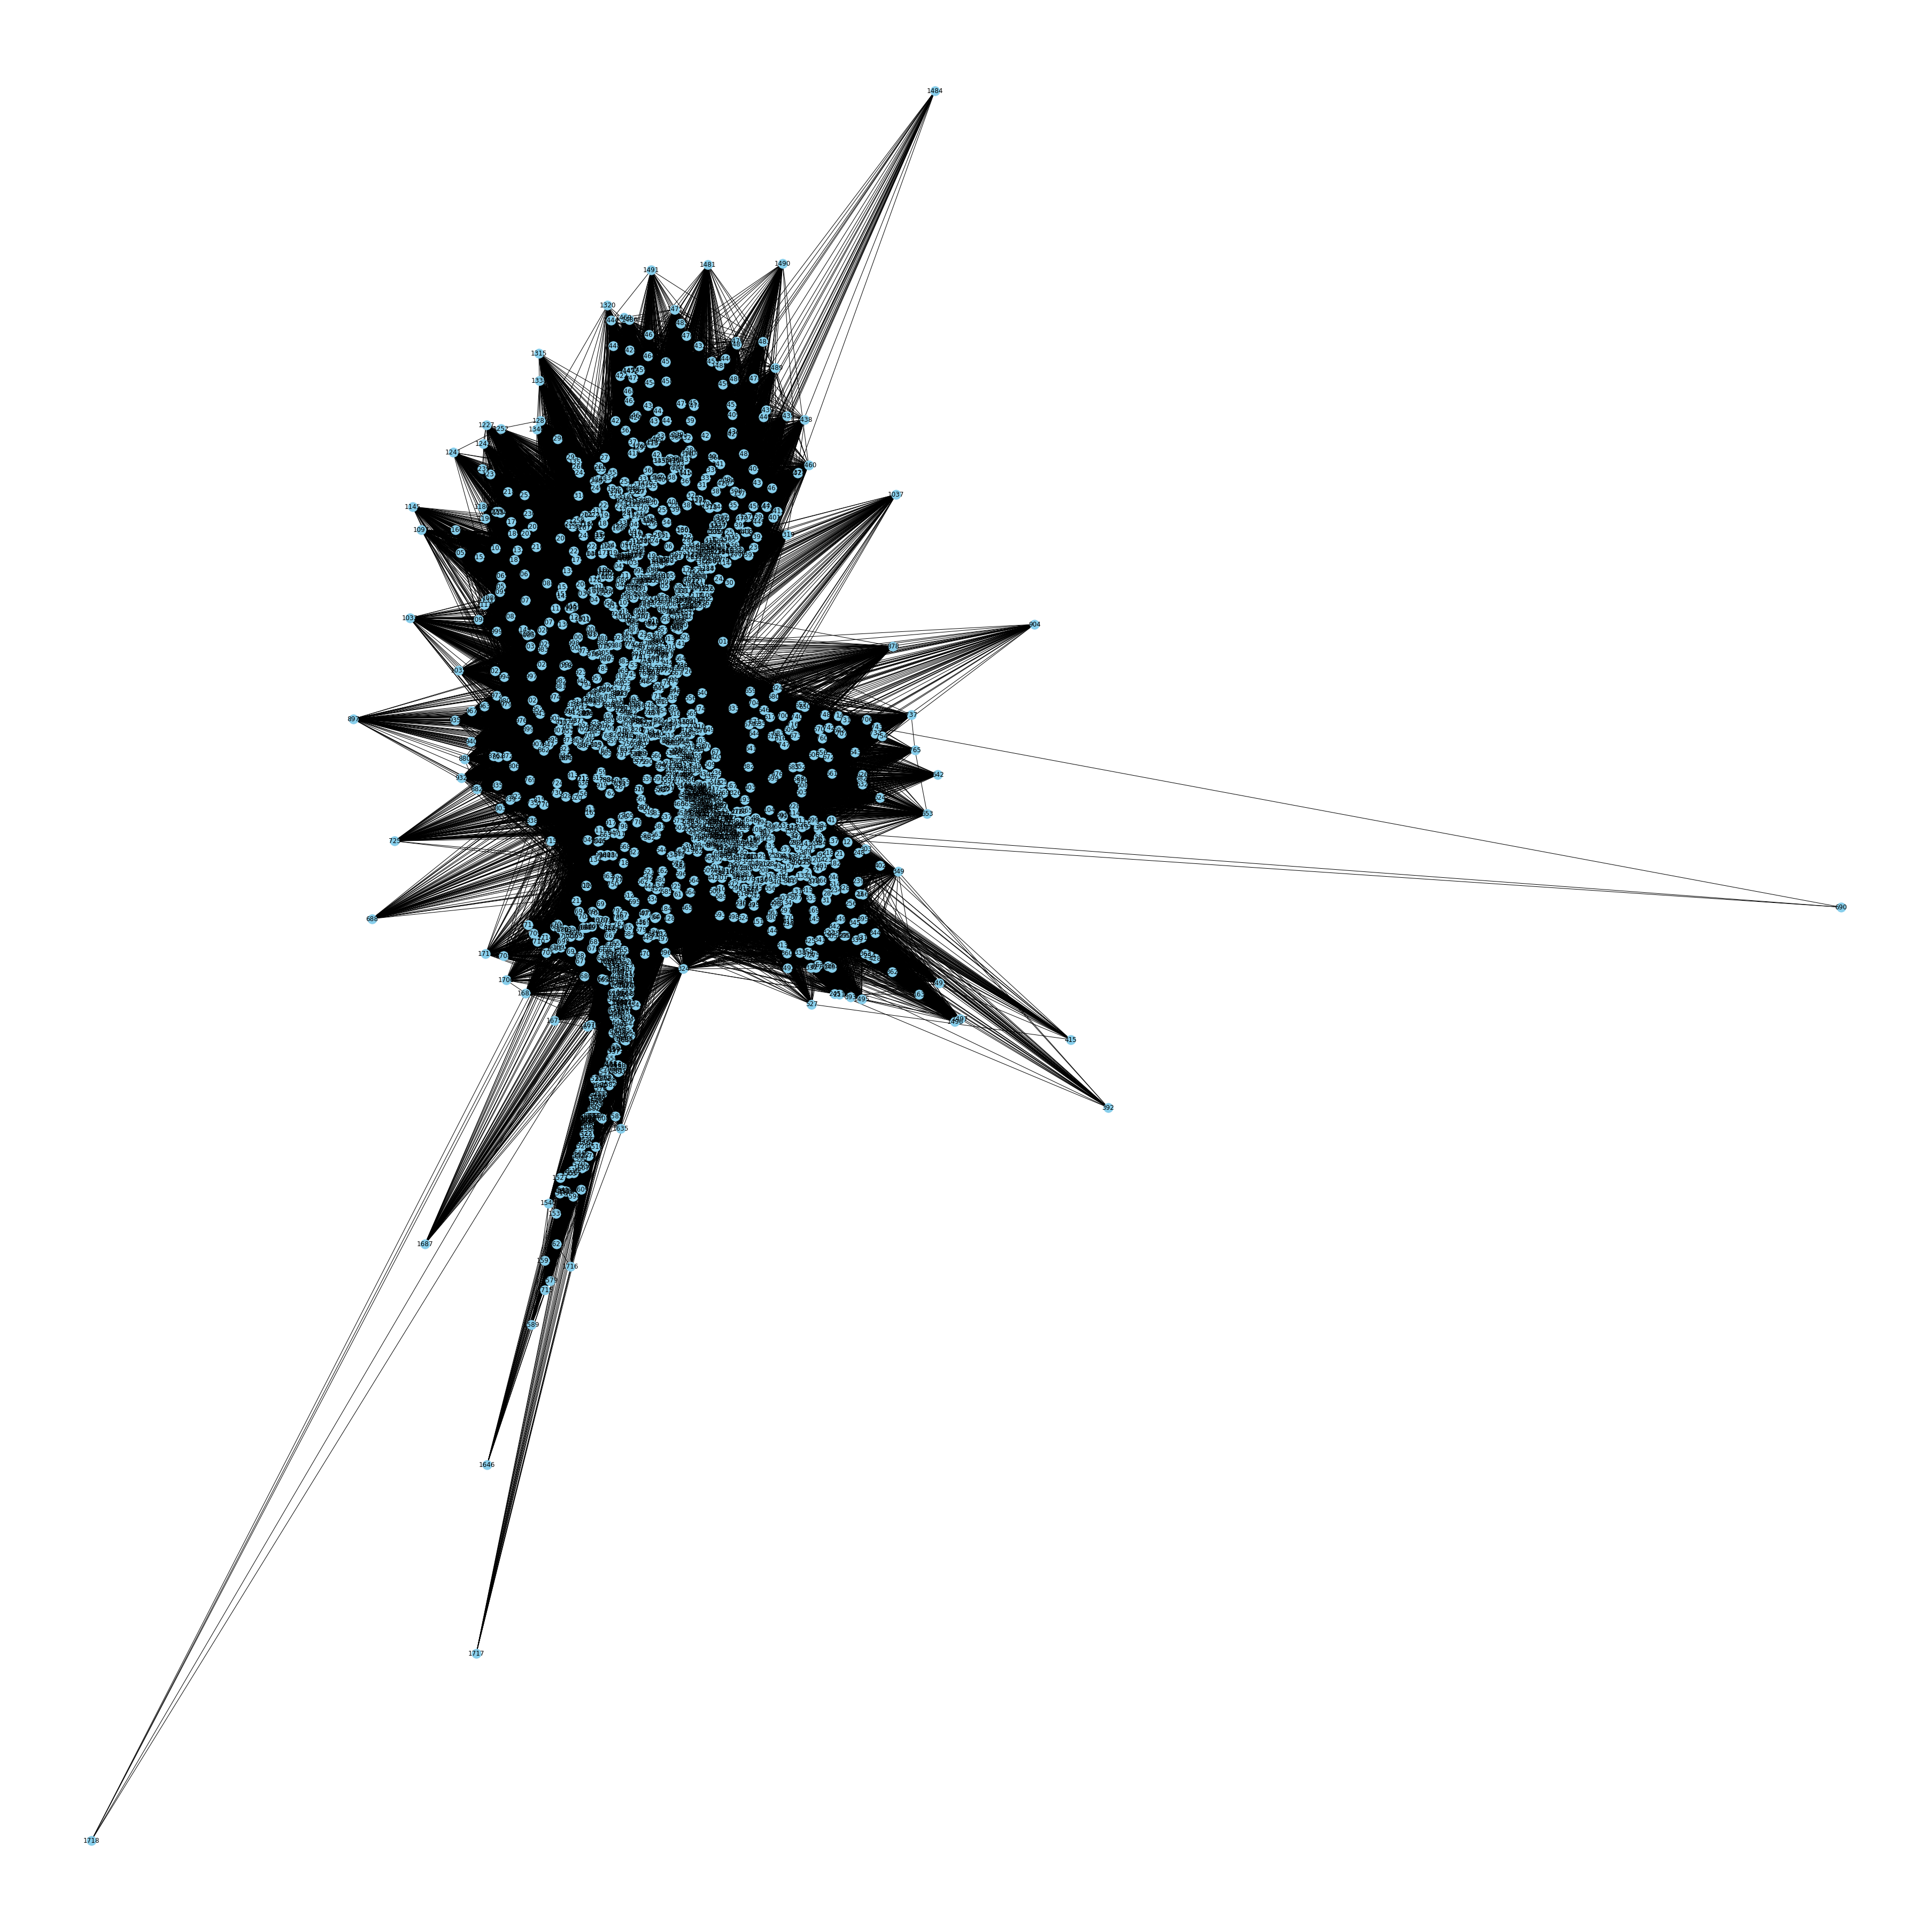

In [ ]:
# Create a default Networkx Graph
G = nx.Graph()

# Adds the nodes for the graph
for line in nodeLabels:
  data = line.split()
  G.add_node(int(data[0]), name = data[1:])

# Adds the edges for the graph
for line in graphData:
  data = line.split()
  map_data = map(int, data)
  data_arguments = list(map_data)
  
  #Add an edge to G
  G.add_edge(data_arguments[0], data_arguments[1], weight = data_arguments[2])

fig = plt.figure(figsize=(50,50))
pos = nx.spectral_layout(G)
nx.draw(G, with_labels=True, node_color="skyblue")
plt.show()





# Basic Graph Analysis

This section provides some basic analysis of the graph. 



In [ ]:
print("The diameter of the graph is " + str(nx.diameter(G)) + ".\n")
print("There are " + str(nx.number_of_nodes(G)) + " number of nodes.\n")
print("There are " + str(nx.number_of_edges(G)) + " number of edges.\n")
print("The density of the graph is " + str(nx.density(G)) + ".\n")
print("The function is_directed for the graph returns " + str(nx.is_directed(G)) + ".\n")
print("The function is_connected for the graph returns " + str(nx.is_connected(G)) + ".\n")




The diameter of the graph is 4.

There are 1718 number of nodes.

There are 424932 number of edges.

The density of the graph is 0.2881084383176385.

The function is_directed for the graph returns False.

The function is_connected for the graph returns True.



Here is another graph using the `networkx spring_layout` function.

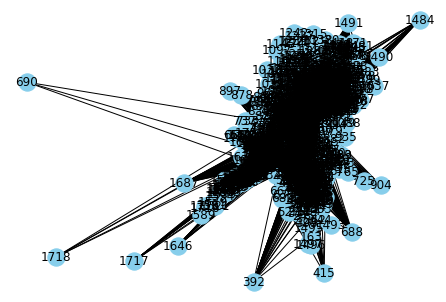

In [ ]:
graph_pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color="skyblue")
plt.show()

# Summary

My initial view of Fowler's data is that it takes a lot of work for Congress to collaborate and pass bills in 2006. Co-sponsorship of bills is a good thing and demonstrates collaboration.

In light of the recent polarizing climate, I would like to view bills and co-sponsorships from 2008 to present and to appropriately label the nodes with the political party of the government official.